In [1]:
#https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

# Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Map

$$f_r(x) = rx(1-x)$$

In [3]:
def logistic(r, x):
    return r * x * (1 - x)

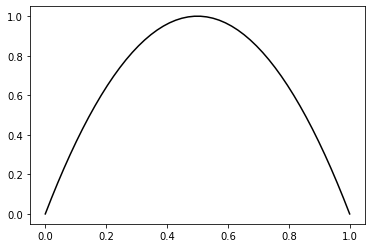

In [4]:
x = np.linspace(0, 1)
plt.plot(x, logistic(4, x), 'k')
plt.show()

In [5]:
def plot_system(r=2, x0=.1, num_iterations=10, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(num_iterations):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10, alpha=(i + 1) / num_iterations)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

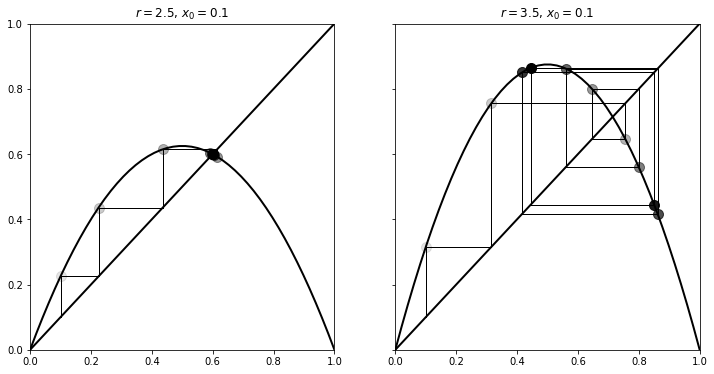

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(12, 6), 
                               sharey=True)
plot_system(r=2.5, x0=.1, num_iterations=10, ax=ax1)
plot_system(r=3.5, x0=.1, num_iterations=10, ax=ax2)
plt.show()

In [7]:
n = 2000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
values = [3, 3.45, 3.557, 3.86]

In [8]:
lyapunov = np.zeros(n)

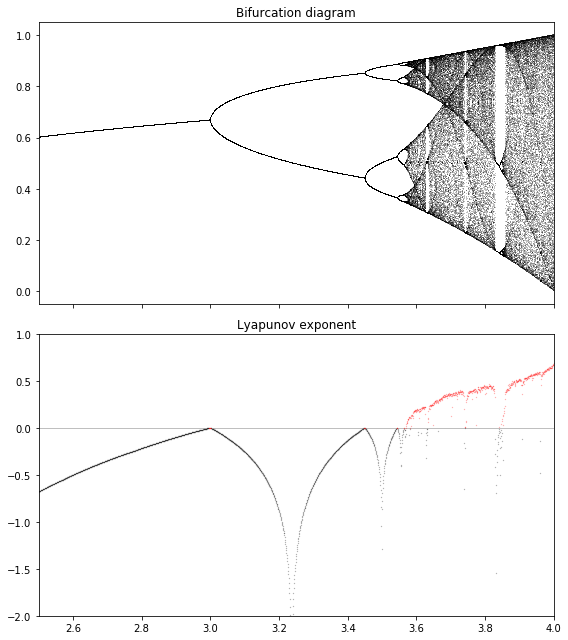

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()